In [32]:
from skimage import data, color
from skimage.transform import resize
import numpy as np
from matplotlib.pyplot import imshow
import concurrent.futures
from threading import Thread
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import multiprocessing
import os
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [2]:
imgs = np.uint8(data.lfw_subset()*255)

In [3]:
def res_skimage(imgs):
    new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
    res_im = []
    for im in imgs:
        image_resized = resize(im, new_size, anti_aliasing=True)
        res_im.append(image_resized)
    return np.asarray(res_im)

In [4]:
pil_imgs = [Image.fromarray(im) for im in imgs]
def res_pil(imgs, method):
    new_size = (imgs[1].size[0]//2, imgs[1].size[1]//2)
    res_im = []
    for im in pil_imgs:
        image_resized = np.asarray(im.resize(new_size, method))
        res_im.append(image_resized)
    return np.asarray(res_im)

In [5]:
pil_imgs = [Image.fromarray(im) for im in imgs]
def res_cv2(imgs):
    new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
    res_im = []
    for im in imgs:
        image_resized = cv2.resize(im, new_size, interpolation = cv2.INTER_LANCZOS4)
        res_im.append(image_resized)
    return np.asarray(res_im)
    

In [6]:
%lprun -f res_skimage res_skimage(imgs)

Timer unit: 1e-09 s

Total time: 0.025106 s
File: /var/folders/rj/ls_3x1nx2q96t6562rd051_00000gn/T/ipykernel_32055/1939787722.py
Function: res_skimage at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def res_skimage(imgs):
     2         1       6000.0   6000.0      0.0      new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
     3         1          0.0      0.0      0.0      res_im = []
     4       200      40000.0    200.0      0.2      for im in imgs:
     5       200   24923000.0 124615.0     99.3          image_resized = resize(im, new_size, anti_aliasing=True)
     6       200      70000.0    350.0      0.3          res_im.append(image_resized)
     7         1      67000.0  67000.0      0.3      return np.asarray(res_im)

In [7]:
%lprun -f res_pil res_pil(pil_imgs, method=Image.LANCZOS)

Timer unit: 1e-09 s

Total time: 0.004555 s
File: /var/folders/rj/ls_3x1nx2q96t6562rd051_00000gn/T/ipykernel_32055/2495973342.py
Function: res_pil at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def res_pil(imgs, method):
     3         1       3000.0   3000.0      0.1      new_size = (imgs[1].size[0]//2, imgs[1].size[1]//2)
     4         1          0.0      0.0      0.0      res_im = []
     5       200      38000.0    190.0      0.8      for im in pil_imgs:
     6       200    4429000.0  22145.0     97.2          image_resized = np.asarray(im.resize(new_size, method))
     7       200      44000.0    220.0      1.0          res_im.append(image_resized)
     8         1      41000.0  41000.0      0.9      return np.asarray(res_im)

In [8]:
%lprun -f res_pil res_pil(pil_imgs, method=Image.HAMMING)


Timer unit: 1e-09 s

Total time: 0.00388 s
File: /var/folders/rj/ls_3x1nx2q96t6562rd051_00000gn/T/ipykernel_32055/2495973342.py
Function: res_pil at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def res_pil(imgs, method):
     3         1       3000.0   3000.0      0.1      new_size = (imgs[1].size[0]//2, imgs[1].size[1]//2)
     4         1          0.0      0.0      0.0      res_im = []
     5       200      24000.0    120.0      0.6      for im in pil_imgs:
     6       200    3765000.0  18825.0     97.0          image_resized = np.asarray(im.resize(new_size, method))
     7       200      46000.0    230.0      1.2          res_im.append(image_resized)
     8         1      42000.0  42000.0      1.1      return np.asarray(res_im)

In [9]:
%lprun -f res_cv2 res_cv2(imgs)

Timer unit: 1e-09 s

Total time: 0.002324 s
File: /var/folders/rj/ls_3x1nx2q96t6562rd051_00000gn/T/ipykernel_32055/572085381.py
Function: res_cv2 at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def res_cv2(imgs):
     3         1       6000.0   6000.0      0.3      new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
     4         1          0.0      0.0      0.0      res_im = []
     5       200      53000.0    265.0      2.3      for im in imgs:
     6       200    2170000.0  10850.0     93.4          image_resized = cv2.resize(im, new_size, interpolation = cv2.INTER_LANCZOS4)
     7       200      47000.0    235.0      2.0          res_im.append(image_resized)
     8         1      48000.0  48000.0      2.1      return np.asarray(res_im)

In [108]:
24923000.0 * 0.9

22430700.0

In [113]:
(24_923_000.0 - 2_170_000.0 )*100/ 24_923_000.0

91.29318300365125

In [114]:
(1- (2_170_000.0 / 24_923_000.0))*100

91.29318300365125

Text(0.5, 1.0, 'Resized Opencv')

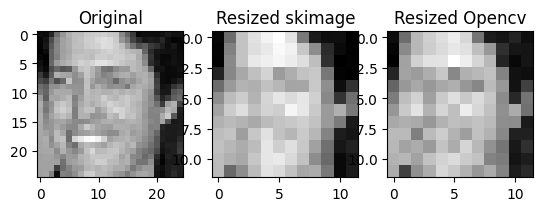

In [10]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(imgs[1], cmap='gray')
axs[1].imshow(res_skimage(imgs)[1], cmap='gray')
axs[2].imshow(res_cv2(imgs)[1], cmap='gray')
axs[0].set_title('Original')
axs[1].set_title('Resized skimage')
axs[2].set_title('Resized Opencv')

## Task 2

In [64]:
from functions import approximate_pi
from fun2 import load_array

In [65]:
# Data to pass to the above fucntion 
nums = [1822725,
        22059421,
        32374695,
        88754320,
        9716266]

In [31]:
%%timeit
for n in nums:
    approximate_pi(n)

10.1 s ± 426 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
# multithreading
%%timeit
threads = []
for n in nums:
    thread = Thread(target=approximate_pi, args=(n,))
    thread.start()
    threads.append(thread)

for thread in threads:
    thread.join()

24.5 s ± 62.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
# Multiprocessing
%%timeit
processes = []
for n in nums:
    process = multiprocessing.Process(target=approximate_pi, args = (n,))
    process.start()
    processes.append(process)
for process in processes:
    process.join()

15.4 s ± 178 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [115]:
# how faster is multiprocess
(24.5 - 15.4)*100/24.5

37.142857142857146

## Task 3

In [69]:
# get files name
numpy_files_names = [os.path.join('./numpy_files', path) for path in os.listdir('numpy_files')]

In [105]:
%%timeit
results = []
# create threads and asign a function for each thread
for file_name in numpy_files_names:
    results.append(load_array(file_name,))
results = np.asanyarray(results)

1.7 s ± 162 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [104]:
# multithreading
%%timeit
threads = []
for file_name in numpy_files_names:
    thread = Thread(target=load_array, args=(file_name,))
    thread.start()
    threads.append(thread)

for thread in threads:
    thread.join()

292 ms ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Multiprocessing

In [119]:

%%timeit
processes = []
for file_name in numpy_files_names:
    process = multiprocessing.Process(target=load_array, args = (file_name,))
    process.start()
    processes.append(process)
# Wait for all processes to complete
for process in processes:
    process.join()

2.13 s ± 82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [121]:
2.2*1000

2200.0

In [116]:
# how faster is multithreading
(2.2*1000 - 292)*100/(2.2*1000)

86.72727272727273